In [1]:
import numpy as np
import pandas as pd 
import cmath 
import scipy.special as sp
import scipy.signal as spg
import scipy.constants as const
import matplotlib.pyplot as plt
plt.style.use('dark_background')
# plt.rcParams['axes.labelsize'] = 18
# plt.rcParams['axes.titlesize'] = 24
# plt.rcParams['legend.fontsize'] = 15

import VNA_data_read_local as vdr

In [2]:
Q1to10_9p8_CT = pd.read_csv('/Users/leayamashiro/whispering_gallery_MAIN/wgm_code/Q_fac_data/Qfac_eigensweep_500MHz_to_10GHz_wCoorsTek_properties.csv', skiprows=4)
     

In [3]:
# clean up work for TE doubles in Q1to5
Q1to10_9p8_CT['Freq rounded'] = Q1to10_9p8_CT['Frequency (GHz)'].round(5)
# Step 3: Drop duplicates, keeping the first occurrence
QfacAll_9p8CT = Q1to10_9p8_CT.drop_duplicates(subset='Freq rounded', keep='first')
#Q5to11['Freq rounded'] = Q5to11['Frequency GHz'].round(6)
#facAll_9p8CT = Qfac1to5[Qfac1to5['Freq rounded'].round(2) != 3.65]

Q_peaks1, _1 = spg.find_peaks(QfacAll_9p8CT['Quality factor (1)'])
Q_peak_freqs1 = QfacAll_9p8CT['Frequency (GHz)'].iloc[Q_peaks1]
Q_peak_Qs1 = QfacAll_9p8CT['Quality factor (1)'].iloc[Q_peaks1]
Q_cfs1 = QfacAll_9p8CT['% search_freq (Hz)'].iloc[Q_peaks1]
peak_dict1 = {'cf': Q_cfs1, 'freqs': Q_peak_freqs1, 'Q': Q_peak_Qs1}
peaks1 = pd.DataFrame(peak_dict1).sort_values('Q', ascending=False).reset_index(inplace=False)
top_peaks1 = peaks1.iloc[0:20]

In [4]:
def plot_Qvfreq(df):
    plt.plot(df['Frequency (GHz)'], df['Quality factor (1)'])
    plt.xlabel('Freq (GHz)')
    plt.ylabel('Q factor')
    plt.title('Q Factor vs. Eigenfrequency')

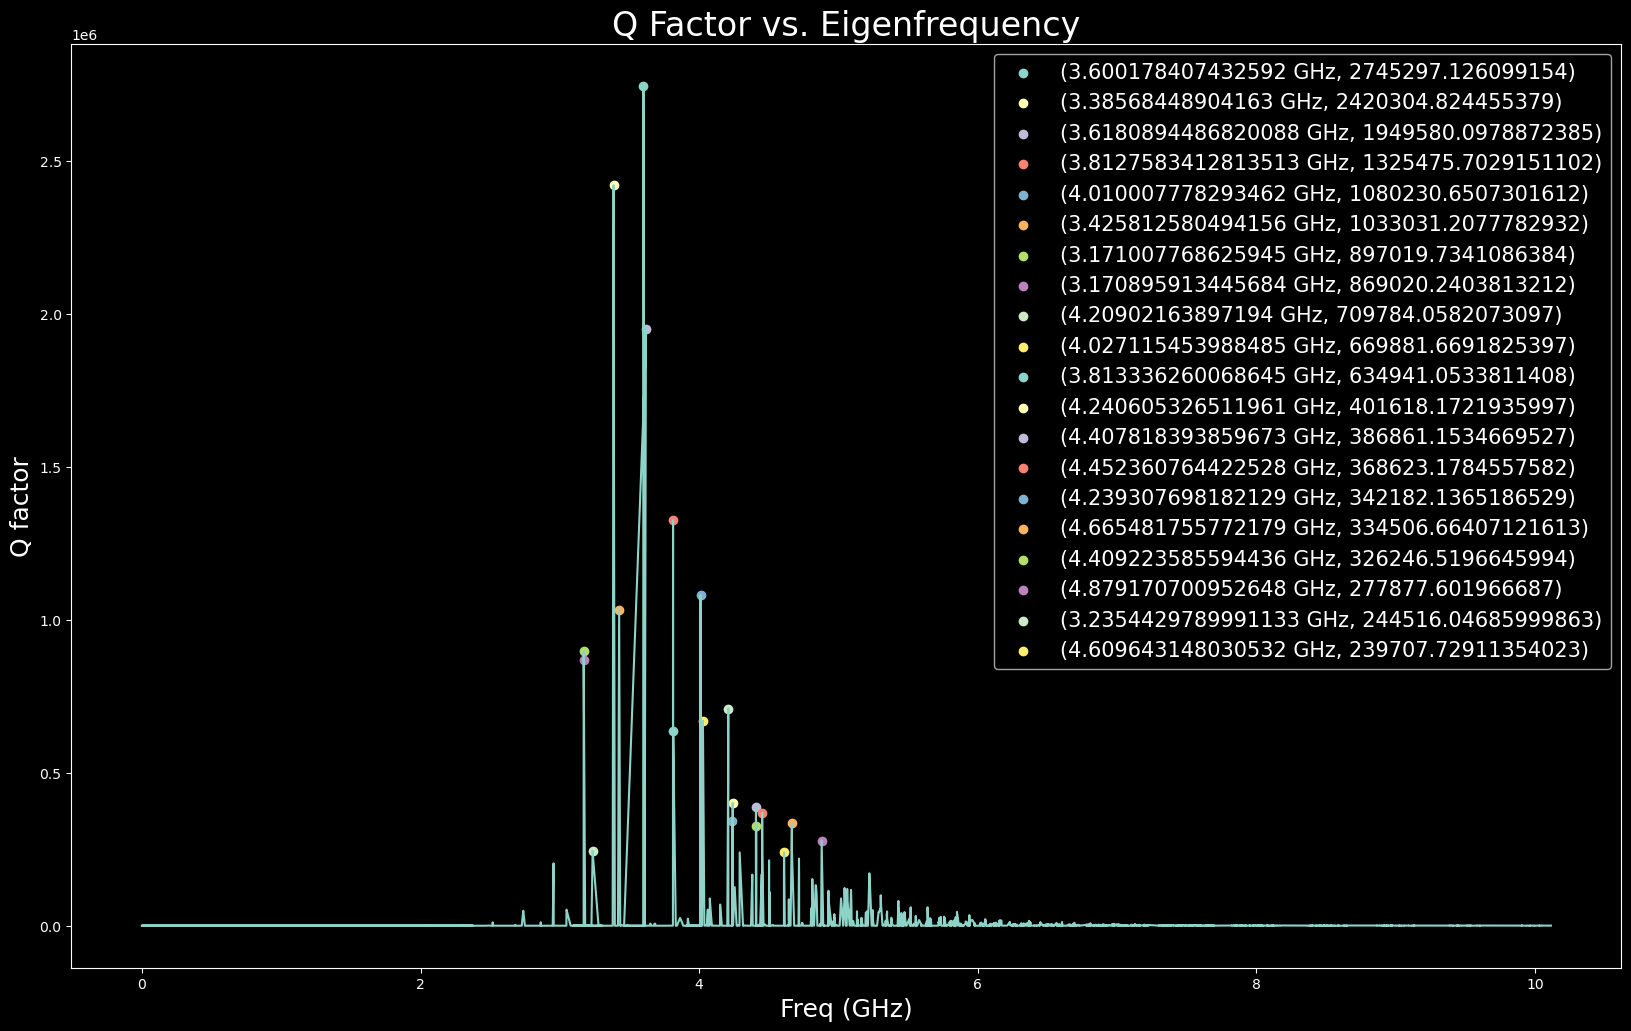

In [5]:
plt.figure(figsize = (20,12))
plot_Qvfreq(QfacAll_9p8CT)
for i in range(len(top_peaks1)):
    plt.scatter(top_peaks1['freqs'].loc[i], top_peaks1['Q'].loc[i], 
                label = f'({top_peaks1["freqs"][i]} GHz, {top_peaks1["Q"][i]})')
plt.legend()

In [6]:
BL_2to4, disk_2to4 = vdr.loader('BL_Narrow_2GHz_to_4GHz_-15to5dB_1601_2025-05-16_15-40-08.txt', 
                                'DISK_Narrow_2GHz_to_4.08GHz_-15to5dB_1601_2025-05-16_15-55-17.txt', 
                                'data/narrow_2GHz_step')
BL_4to6, disk_4to6 = vdr.loader('BL_Narrow_4GHz_to_6GHz_-15to5dB_1601_2025-05-16_15-42-10.txt', 
                                'DISK_Narrow_4GHz_to_6.08GHz_-15to5dB_1601_2025-05-16_15-57-05.txt', 
                                'data/narrow_2GHz_step')

In [7]:
BL_concat1 = pd.concat([BL_2to4, BL_4to6]).drop_duplicates(subset=['Freq (Hz)'])
disk_concat1 = pd.concat([disk_2to4, disk_4to6]).drop_duplicates(subset=['Freq (Hz)'])
S21_subtracted = 20*np.log10(np.abs(disk_concat1['Complex (decimal)']))-20*np.log10(np.abs(BL_concat1['Complex (decimal)']))

In [8]:
Q_fac_2to6 = Q1to10_9p8_CT[(Q1to10_9p8_CT['Frequency (GHz)']>=2.000000)&(Q1to10_9p8_CT['Frequency (GHz)']<=6.080000)]

In [9]:
Q_fac_2to6

,% search_freq (Hz),Eigenfrequency (GHz),Frequency (GHz),Quality factor (1),Freq rounded
121,5.000000e+08,2.0661214915469954+0.4488613334124242i,2.066121,2.301514,2.06612
122,5.000000e+08,2.0661634857431115+0.44890352492576835i,2.066163,2.301345,2.06616
123,5.000000e+08,2.0668280613918153+0.06996955827716857i,2.066828,14.769481,2.06683
124,5.000000e+08,2.0668541432785523+0.0699569939668338i,2.066854,14.772320,2.06685
125,5.000000e+08,2.0673788203050463+0.445741060458229i,2.067379,2.319036,2.06738
...,...,...,...,...,...
2675,6.000000e+09,6.074818517989819+0.25564565362824115i,6.074819,11.881326,6.07482
2676,6.000000e+09,6.075239212224019+0.0030323608127304537i,6.075239,1001.734224,6.07524
2677,6.000000e+09,6.077817699848524+0.06969705720997081i,6.077818,43.601681,6.07782
2678,6.000000e+09,6.078542554758812+0.005907668106882797i,6.078543,514.462089,6.07854


Text(0, 0.5, 'S21 (dB)')

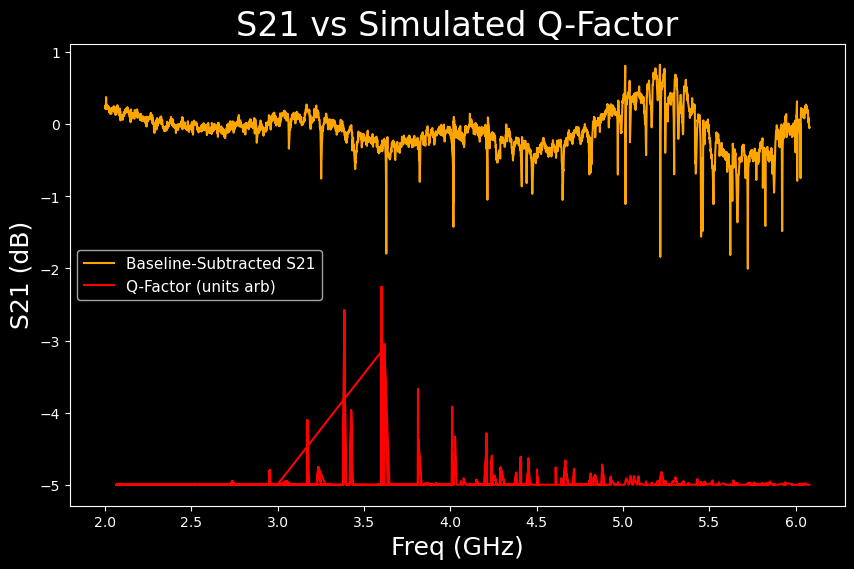

In [10]:
plt.figure(figsize=(10,6))

plt.title('S21 vs Simulated Q-Factor')
plt.plot(1e-9*BL_concat1['Freq (Hz)'], 
            20*np.log10(np.abs(disk_concat1['Complex (decimal)']))-20*np.log10(np.abs(BL_concat1['Complex (decimal)'])), 
            label = 'Baseline-Subtracted S21', color = 'orange')

plt.plot(Q_fac_2to6['Frequency (GHz)'], Q_fac_2to6['Quality factor (1)']/1e6 - 5, label = 'Q-Factor (units arb)', color = 'red')
plt.legend(loc='center left', fontsize =11)
plt.xlabel('Freq (GHz)')
plt.ylabel('S21 (dB)')

#### doing S21 dips for the actual data

In [11]:
S21_subtracted = (20*np.log10(np.abs(disk_concat1['Complex (decimal)']))
                  -20*np.log10(np.abs(BL_concat1['Complex (decimal)'])))
S21_freqs = 1e-9*BL_concat1['Freq (Hz)']

In [12]:
S21_sub = pd.DataFrame({'freqs':S21_freqs, 'S21':S21_subtracted})

In [13]:
S21_sub

,freqs,S21
0,2.0000,0.236200
1,2.0013,0.255823
2,2.0026,0.260953
3,2.0039,0.208845
4,2.0052,0.275663
...,...,...
1596,6.0748,0.087191
1597,6.0761,0.001615
1598,6.0774,-0.038678
1599,6.0787,-0.054498


In [17]:
S21_dips, _dips = spg.find_peaks(-S21_subtracted)
dip_freqs = S21_sub['freqs'].iloc[S21_dips]
dip_S21 = S21_sub['S21'].iloc[S21_dips]
dip_dict = {'freqs': dip_freqs, 'dip S21': dip_S21}
dips_2to6 = pd.DataFrame(dip_dict).sort_values('dip S21', ascending=True).reset_index(inplace=False)
top_dips_2to6 = dips_2to6.iloc[0:10]

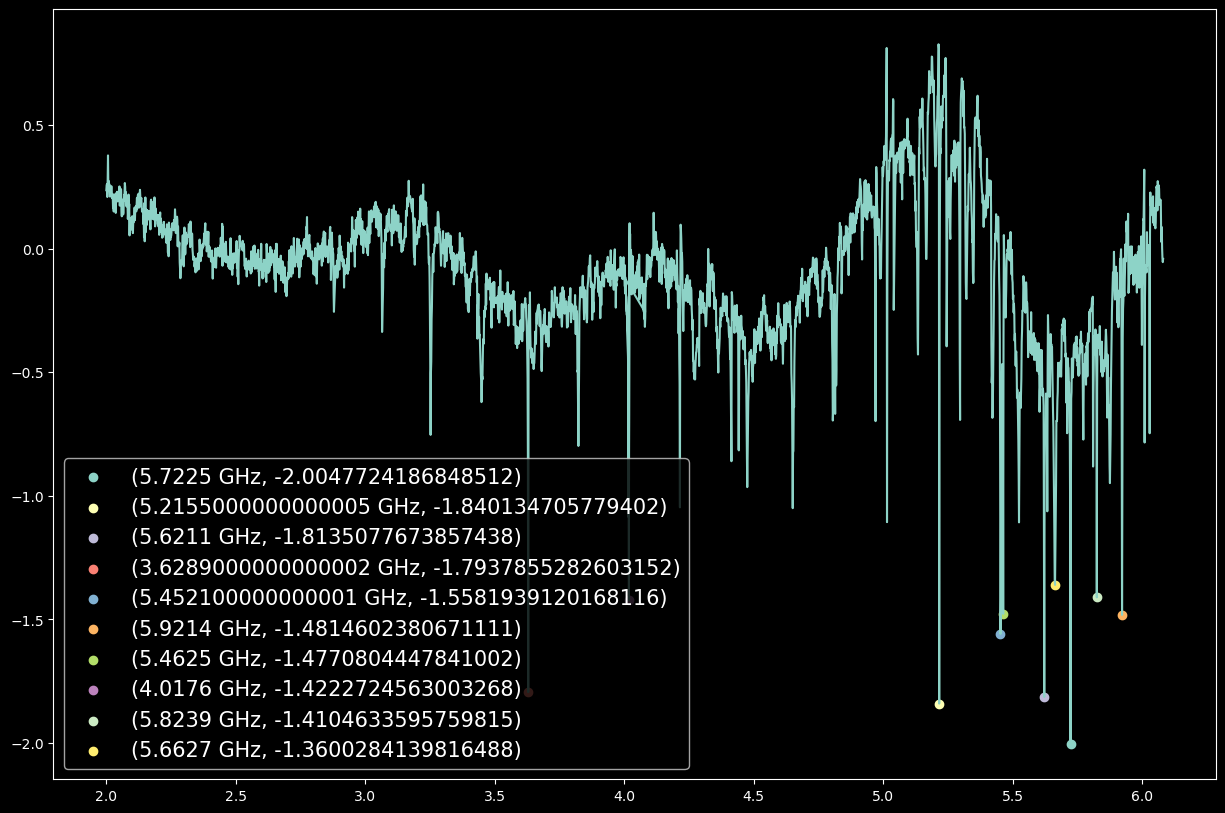

In [16]:
plt.figure(figsize = (15,10))
plt.plot(S21_sub['freqs'], S21_sub['S21'])
for i in range(len(top_dips)):
    plt.scatter(top_dips['freqs'].loc[i], top_dips['dip S21'].loc[i], 
                label = f'({top_dips["freqs"][i]} GHz, {top_dips["dip S21"][i]})')
plt.legend()

In [26]:
dips_2to4 = dips_2to6[dips_2to6['freqs']<=4].reset_index(inplace=False)
top_dips_2to4 = dips_2to4.iloc[0:10]
S21_sub_2to4 = S21_sub[S21_sub['freqs']<=4]

In [27]:
top_dips_2to4

,level_0,index,freqs,dip S21
0,3,1253,3.6289,-1.793786
1,21,1402,3.8226,-0.798026
2,25,963,3.2519,-0.753309
3,40,1114,3.4482,-0.620846
4,51,1117,3.4521,-0.528754
5,67,1399,3.8187,-0.497949
6,69,1293,3.6809,-0.495358
7,72,1269,3.6497,-0.486915
8,80,1271,3.6523,-0.463655
9,81,1265,3.6445,-0.463027


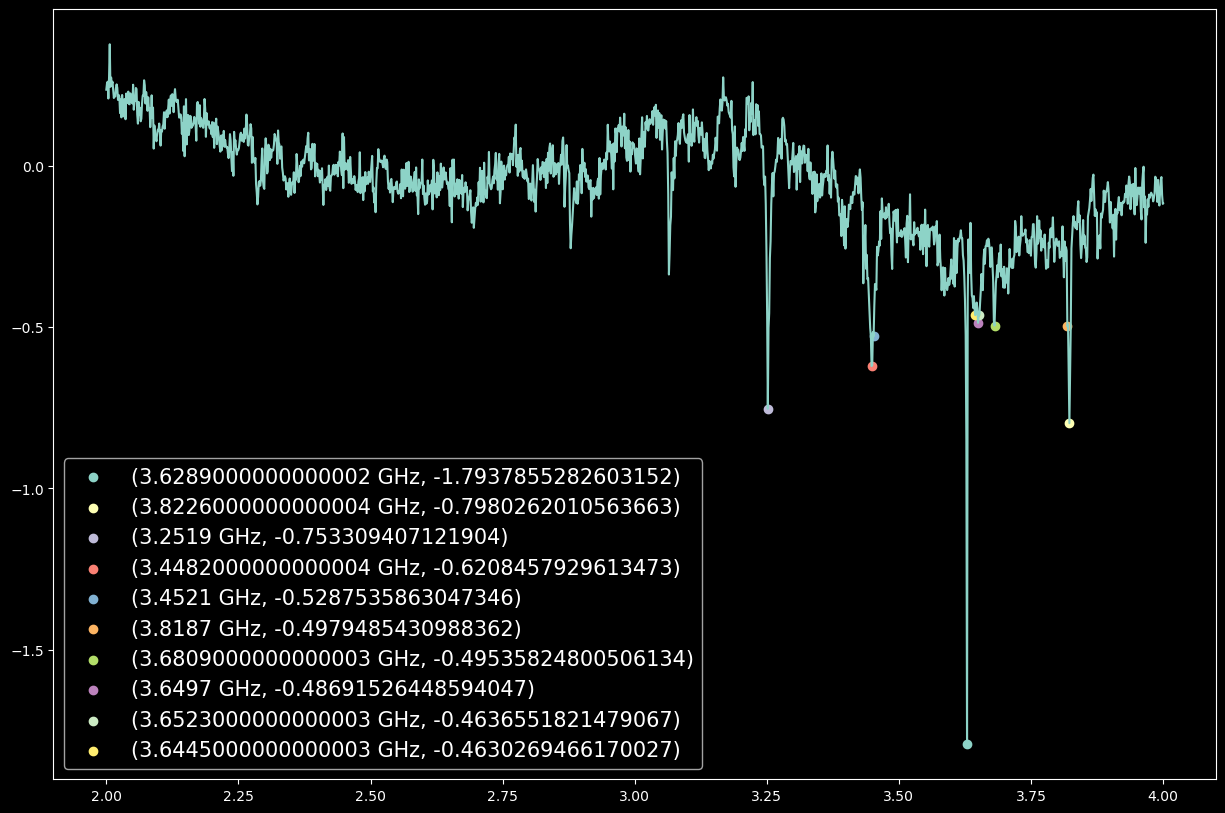

In [28]:
plt.figure(figsize = (15,10))
plt.plot(S21_sub_2to4['freqs'], S21_sub_2to4['S21'])
for i in range(len(top_dips_2to4)):
    plt.scatter(top_dips_2to4['freqs'].iloc[i], top_dips_2to4['dip S21'].iloc[i], 
                label = f'({top_dips_2to4["freqs"][i]} GHz, {top_dips_2to4["dip S21"][i]})')
plt.legend()

In [29]:
Q_fac_2to4 = Q1to10_9p8_CT[(Q1to10_9p8_CT['Frequency (GHz)']>=2.000000)&(Q1to10_9p8_CT['Frequency (GHz)']<=4.0)]